In [1]:
from main_simple_lib import *

2023-12-11 19:39:32.608815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 19:39:33.832450: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 19:39:38.498853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-11 19:39:38.499619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda116.so
CUDA SETUP: CUDA runtime path found: /data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 116
CUDA SETUP: Loading binary /data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda116.so...


/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so.11.0'), PosixPath('/data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so')}.. We'll flip a coin and try one of these, in order to fail forward.
Either way, this might cause trouble in the future:
If you get `CUDA error: invalid device function` errors, the above might be the cause and the solution is to make sure only one ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] in the paths that we search based on your env.
  warn(msg)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
import pandas as pd
test_data = pd.read_csv('plip_test_data/test_data.csv')
test_data.head()

,tweet_url,caption,image_name
0,https://twitter.com/deathunderglass/status/476...,Metastatic pancreatic CA in a supposed chronic...,test_image1.jpg
1,https://twitter.com/deathunderglass/status/515...,Wischnevksy ulcer in gastric mucosa due to pro...,test_image2.jpg
2,https://twitter.com/deathunderglass/status/544...,Locked in each human skull is a little world a...,test_image3.jpg
3,https://twitter.com/marenwhymd/status/59380523...,"Widely metastatic melanoma, including to the h...",test_image5.jpg
4,https://twitter.com/evemariecrane/status/65685...,Opportunistic stain for opportunistic infectio...,test_image6.jpg


In [3]:
image_path = ["plip_test_data/" + image_name for image_name in test_data['image_name'].tolist()]
images_list = [load_image(path) for path in image_path]
prompts_list = test_data['caption'].tolist()

### Testing the PLIP Score

Image:  6

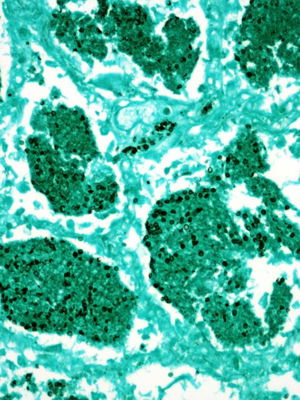

Text:  6

disseminated crypto (retina, brain) and pneumocystis jiroveci (lung)

Similarity Score:  tensor(28.4681)

In [22]:
img_idx=6
text_idx=6
image = images_list[6]
prompt = prompts_list[6]
print("Image: ", img_idx)
show_single_image(image)
print("Text: ", text_idx)
print(prompt)
image_patch = ImagePatch(image)
sim_score = image_patch._score_plip(prompt)
print('Similarity Score: ', str(sim_score))

### Testing the string match with the image

Image:  6

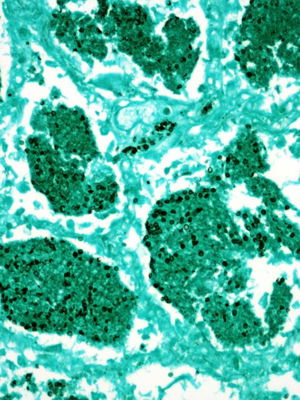

Prompt List: 

[
    "Metastatic pancreatic CA in a supposed chronic alcoholic...but that jaundice wasn't from drinking",
    'Wischnevksy ulcer in gastric mucosa due to prolonged hypothermia',
    'Locked in each human skull is a little world all its own',
    'Widely metastatic melanoma, including to the heart',
    'Opportunistic stain for opportunistic infection: mucicarmine+ glands, neg lung PCP and LN full of crypto!',
    'Complications of CLL/SLL: lung consolidation with invasive fungal aspergillosis',
    'disseminated crypto (retina, brain) and pneumocystis jiroveci (lung)'
]

Predicted Index:  6 , Prompt:  disseminated crypto (retina, brain) and pneumocystis jiroveci (lung)

In [28]:
idx=6
image = images_list[idx]
print("Image: ", idx)
show_single_image(image)
print("Prompt List: \n", prompts_list)
image_patch = ImagePatch(image)
selected_prompt = image_patch.best_text_match_plip(prompts_list)
print("Predicted Index: ", str(prompts_list.index(selected_prompt)), ", Prompt: ", selected_prompt)


### Testing the image match with the string

Prompt:  disseminated crypto (retina, brain) and pneumocystis jiroveci (lung)

Actual Image

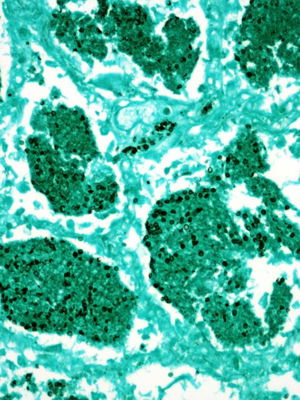

Predicted Image

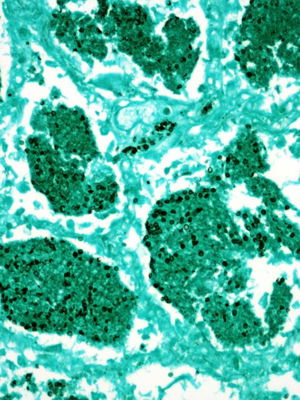

In [30]:
patch_list = [ImagePatch(image) for image in images_list]
idx = 6
prompt = prompts_list[idx]
print("Prompt: ", prompt)
print("Actual Image")
show_single_image(patch_list[idx].cropped_image)
print("Predicted Image")
result_patch = best_image_match_plip(patch_list, prompt)
show_single_image(result_patch.cropped_image)